# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import axes3d
from matplotlib.ticker import LinearLocator
from matplotlib import cm

from edp import difusao_2d
from sistemas_aleatorios import rwalk, coeficiente_D, rwalk_2d, cafe_com_creme, entropia
from matrizes import mprint

tamanho_mark = 1
tamanho_plot = (7, 7)


https://mathworld.wolfram.com/RandomWalk1-Dimensional.html

# Exercício 1

In [2]:
m_1 = 100000
n_1 = 100
x_1, x2ave_1 = rwalk(m=m_1, n=n_1)


In [3]:
D_1 = coeficiente_D(x2ave_1)
print(D_1)


0.49993+/-0.00011


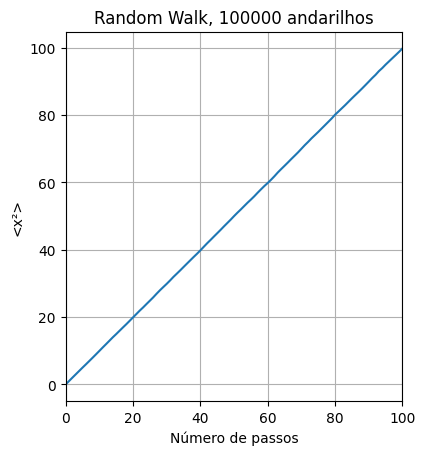

In [4]:
fig_1, ax_1 = plt.subplots()
ax_1.set_title('Random Walk, ' + str(m_1) + ' andarilhos')
ax_1.set_xlabel('Número de passos')
ax_1.set_ylabel('<x²>')
ax_1.set_aspect('equal')
ax_1.grid()
ax_1.set_xlim(0, n_1)
ax_1.plot(x2ave_1)


# Exercício 2

In [5]:
m_2 = 100000
n_2 = 100
p_2 = 0.25
x_2, x2ave_2 = rwalk(p_esq=p_2, m=m_2, n=n_2)


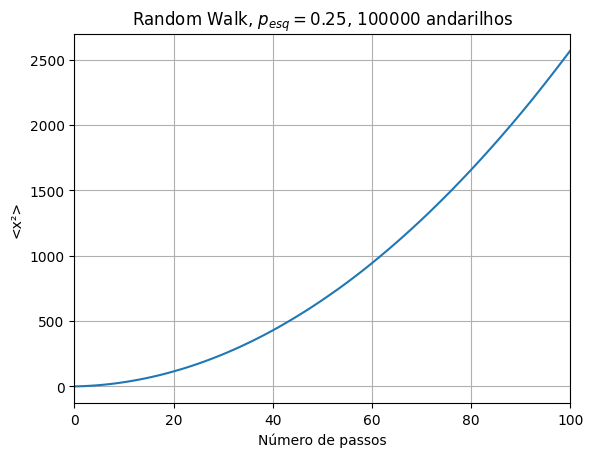

In [6]:
fig_2, ax_2 = plt.subplots()
ax_2.set_title('Random Walk, ' +
               '$p_{esq} = 0.25$, ' + str(m_2) + ' andarilhos')
ax_2.set_xlabel('Número de passos')
ax_2.set_ylabel('<x²>')
# ax_2.set_aspect('equal')
ax_2.grid()
ax_2.set_xlim(0, n_2)
ax_2.plot(x2ave_2)


# Exercício 3

In [2]:
posicoes = cafe_com_creme(m=1000, t=20000)
S_4 = entropia(posicoes)


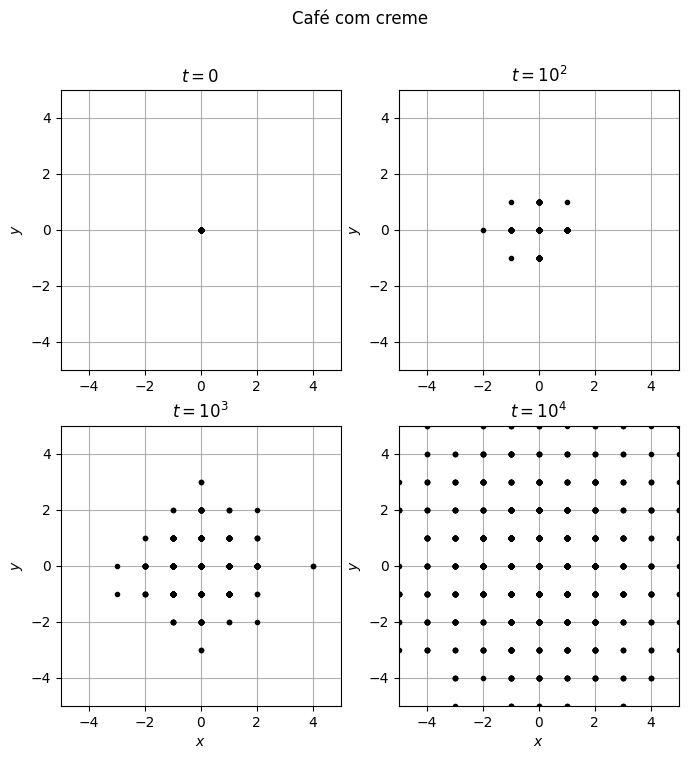

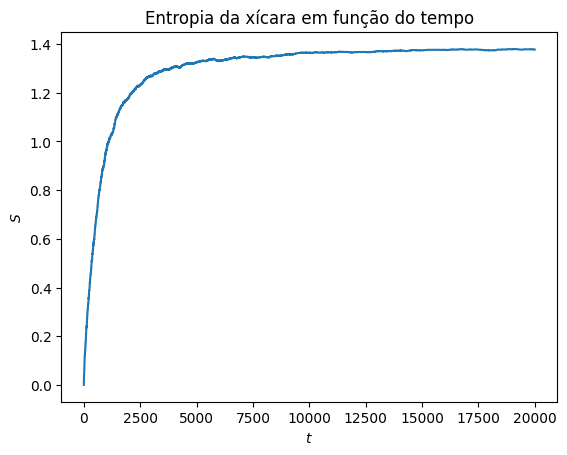

In [3]:
fig_3a, axs_3a = plt.subplots(2, 2)
fig_3a.suptitle('Café com creme')
fig_3a.set_size_inches(8, 8)

axs_3a[0, 0].set_title('$t = 0$')
# axs_3a[0, 0].set_xlabel('$x$')
axs_3a[0, 0].set_ylabel('$y$')
axs_3a[0, 0].set_xlim(-5, 5)
axs_3a[0, 0].set_ylim(-5, 5)
axs_3a[0, 0].set_aspect('equal')
axs_3a[0, 0].grid()

axs_3a[0, 1].set_title('$t = 10^2$')
# axs_3a[0, 1].set_xlabel('$x$')
axs_3a[0, 1].set_ylabel('$y$')
axs_3a[0, 1].set_xlim(-5, 5)
axs_3a[0, 1].set_ylim(-5, 5)
axs_3a[0, 1].set_aspect('equal')
axs_3a[0, 1].grid()

axs_3a[1, 0].set_title('$t = 10^3$')
axs_3a[1, 0].set_xlabel('$x$')
axs_3a[1, 0].set_ylabel('$y$')
axs_3a[1, 0].set_xlim(-5, 5)
axs_3a[1, 0].set_ylim(-5, 5)
axs_3a[1, 0].set_aspect('equal')
axs_3a[1, 0].grid()

axs_3a[1, 1].set_title('$t = 10^4$')
axs_3a[1, 1].set_xlabel('$x$')
axs_3a[1, 1].set_ylabel('$y$')
axs_3a[1, 1].set_xlim(-5, 5)
axs_3a[1, 1].set_ylim(-5, 5)
axs_3a[1, 1].set_aspect('equal')
axs_3a[1, 1].grid()

for particula in range(np.shape(posicoes)[0]):
    axs_3a[0, 0].plot(posicoes[particula, 0, 0], posicoes[particula, 0, 1], '.', color='black')
    axs_3a[0, 1].plot(posicoes[particula, 100, 0], posicoes[particula, 100, 1], '.', color='black')
    axs_3a[1, 0].plot(posicoes[particula, 1000, 0], posicoes[particula, 1000, 1], '.', color='black')
    axs_3a[1, 1].plot(posicoes[particula, 10000, 0], posicoes[particula, 10000, 1], '.', color='black')

fig_3b, ax_3b = plt.subplots()
ax_3b.set_title('Entropia da xícara em função do tempo')
ax_3b.set_xlabel('$t$')
ax_3b.set_ylabel('$S$')
ax_3b.plot(S_4)



# Exercício 4

In [26]:
dim_4 = np.array([15, 15])
meio_4 = dim_4 // 2
L_4 = 1.0
D_4 = 1.0
dx_4 = 0.01
dt_4a = (dx_4)**2 / (4 * D_4)
t_f_4 = 10.0

X_4 = np.linspace(-L_4 / 2, L_4 / 2, dim_4[0])
Y_4 = np.linspace(-L_4 / 2, L_4 / 2, dim_4[1])
Xm_4, Ym_4 = np.meshgrid(X_4, Y_4)
Xm_4 = Xm_4.transpose()
Ym_4 = Ym_4.transpose()


## 4. a)

In [28]:
rho_0_4a = np.zeros(dim_4)
rho_0_4a[meio_4[0] - 2:meio_4[0] + 2 + 1, meio_4[1] - 2:meio_4[1] + 2 + 1] = 1.0
# rho_0_4a[meio_4[0], meio_4[1]] = 1.0

# mprint(rho_0_4a)

rho_4a = difusao_2d(
    rho_0=rho_0_4a,
    t_f=t_f_4,
    dx=dx_4,
    D=D_4
)


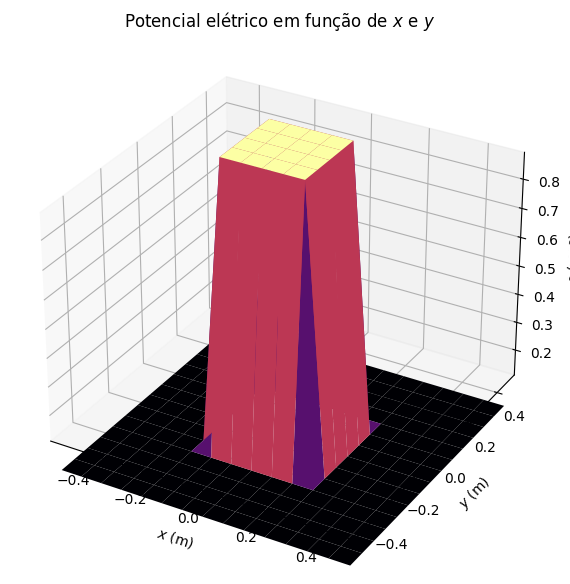

In [29]:
fig_4a, ax_4a = plt.subplots(subplot_kw={"projection": "3d"})
ax_4a.set_title('Potencial elétrico em função de $x$ e $y$')
ax_4a.set_xlabel('$x$ (m)')
ax_4a.set_ylabel('$y$ (m)')
ax_4a.set_zlabel('$\\rho$ (m⁻³)')
ax_4a.set_xlim(- L_4 / 2, L_4 / 2)
ax_4a.set_ylim(- L_4 / 2, L_4 / 2)
ax_4a.set_zlim(0, 1)
ax_4a.set_aspect('equal')
fig_4a.set_size_inches(tamanho_plot)

frames = 26 # np.shape(rho_4a)[2]

fig_4a = ax_4a.plot_surface(Xm_4, Ym_4, rho_4a[:, :, 0], cmap=cm.inferno)

# for n in range(frames):
#     fig = plt.figure(figsize=(10, 10))
#     ax = fig.add_subplot(111, projection='3d')
#     ax.plot_surface(Xm_4, Ym_4, rho_4a[:, :, n], cmap=cm.inferno)
#     # ax.set_xticks([])
#     # ax.set_yticks([])
#     # ax.set_zticks([])
#     # ax.set_xlim(-8,8)
#     # ax.set_xlim(-8,8)
#     ax.set_zlim(0, 1)
#     plt.savefig(f"video/{n}.png")
#     plt.close()

# from PIL import Image

# images = [Image.open(f"video/{n}.png") for n in range(frames)]

# images[0].save('ball.gif', save_all=True, append_images=images[1:], duration=100, loop=0)

# def difusao_1(n):
#     ax_4a.clear
#     ax_4a.plot_surface(Xm_4, Ym_4, rho_4a[:, :, n], cmap=cm.inferno)
#     return fig_4a

# ani_4a = animation.FuncAnimation(
#     fig=fig_4a,
#     func=difusao_1,
#     frames=np.shape(rho_4a)[2],
#     interval=dt_4a * 1000,
#     blit=True,
#     repeat=True
# )

# fig_4a.colorbar(plot_4a, shrink=0.5)

## 4. b)

## 4. c)

# Exercício 5

# Salvar imagens

In [4]:
# fig_1.savefig(fname='lista03/' + 'fig_1.pdf')

# fig_2.savefig(fname='lista03/' + 'fig_2.pdf')

# fig_3a.savefig(fname='lista03/' + 'fig_3a.pdf')
# fig_3b.savefig(fname='lista03/' + 'fig_3b.pdf')

# ani_3.save('lista03/video_entropia.mp4')

# ani_4a.save('lista03/video_difusao1.mp4')
